Add your import statements and the database connection statements in the below code block

Database file path = '/course/data/CSE-578/dinofunworld.db'

In [2]:
# your code here
import sqlite3
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import parallel_coordinates
db_filename = '/course/data/CSE-578/dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

### **Question 1:**
Create a distance matrix suitable for use in hierarchical clustering of the checkin sequences of the 5 specified visitors.

Your distance function should count the number of dissimilarities in the sequences without considering any other factors.

**Note** 
* The distance matrix should be reported as a dictionary of dictionaries (eg. {1: {2:0, 3:0, 4:0}, 2: {1:0, 3:0, ...}, ...}).
* The order of the output is not important.

In [3]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
fiveVisitorsID = ['165316', '1835254', '296394', '404385', '448990']
sequences = {}
for visitorID in fiveVisitorsID:
    query = "SELECT sequence FROM sequences  WHERE visitorID=" + visitorID
    #print(query)
    c.execute(query)
    result = c.fetchone()
    #print(result)
    if result:
        tmpresult = result[0].split('-')
        sequences[visitorID] = tmpresult

#calculate dissimilarity/distance FUNCTION (1 dissimilar = distance + 1)
def cal_dist(seqX, seqY):
    lenX = len(seqX) #X lenth will equal Y length from discription
    dissimilar_count = 0
    for i in range(lenX):
        if seqX[i] != seqY[i]:
            dissimilar_count += 1
    return dissimilar_count

#distance matrix init
distance_matrix = {int(visitorID): {} for visitorID in fiveVisitorsID}
#print(distance_matrix)
for i, visitorX in enumerate(fiveVisitorsID):
    for j, visitorY in enumerate(fiveVisitorsID):
        if visitorX != visitorY:
            dist = cal_dist(sequences[visitorX], sequences[visitorY])
            tmpvisitorX = int(visitorX)
            tmpvisitorY = int(visitorY)
            distance_matrix[tmpvisitorX][tmpvisitorY] = dist

print(distance_matrix)

{165316: {1835254: 336, 296394: 318, 404385: 329, 448990: 318}, 1835254: {165316: 336, 296394: 282, 404385: 298, 448990: 282}, 296394: {165316: 318, 1835254: 282, 404385: 303, 448990: 0}, 404385: {165316: 329, 1835254: 298, 296394: 303, 448990: 303}, 448990: {165316: 318, 1835254: 282, 296394: 0, 404385: 303}}


### **Question 2:**  
Create and display a Parallel Coordinate Plot displaying the minimum, maximum and average attendance for each ride in the park.

For this question, display a Parallel Coordinate Plot in the notebook and print the data used to create a Parallel Coordinate Plot as a dictionary of dictionaries (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... })

**Note:** 
* Not all attractions are rides.
* The output should be a dictionary and the order of the output is not important.
* Use the parallel coordinates function from the **pandas library** to generate the graph.
* The Parallel Coordinate plot must have the below mentioned parameters,
    * legend and it should be outside the plot.
    * y-label ('**Attendance**')
    * title named '**Ride Attendance - Minimum, Maximum, Average**'
* The plot must not have the following parameters,
    * do not set figure size
    * do not set font size or font-weight for titles and labels

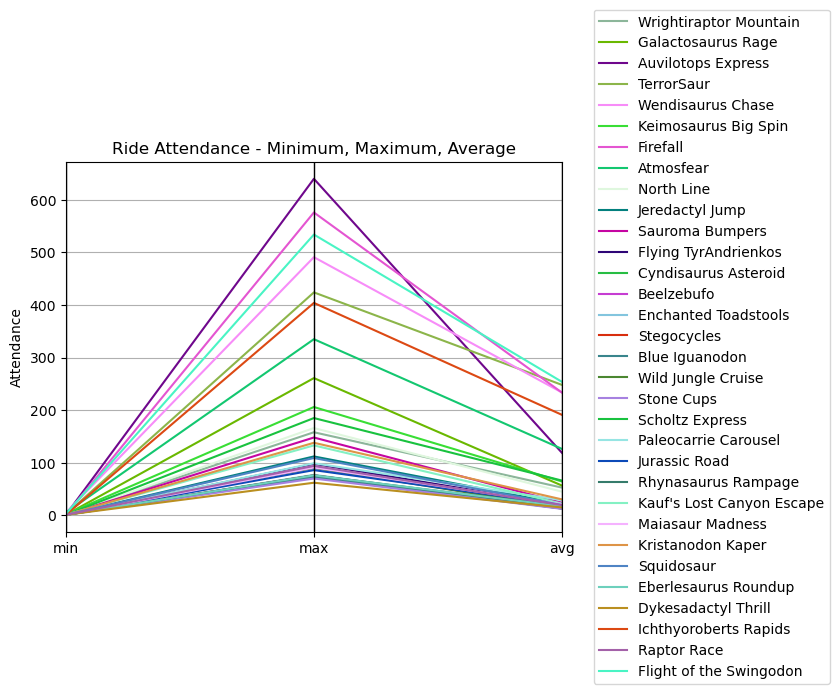

{'Wrightiraptor Mountain': {'min': 1, 'max': 158, 'avg': 52.75}, 'Galactosaurus Rage': {'min': 1, 'max': 261, 'avg': 56.63715277777778}, 'Auvilotops Express': {'min': 1, 'max': 640, 'avg': 118.97916666666667}, 'TerrorSaur': {'min': 2, 'max': 424, 'avg': 248.09375}, 'Wendisaurus Chase': {'min': 5, 'max': 491, 'avg': 233.6875}, 'Keimosaurus Big Spin': {'min': 2, 'max': 206, 'avg': 64.39756944444444}, 'Firefall': {'min': 1, 'max': 576, 'avg': 233.46875}, 'Atmosfear': {'min': 5, 'max': 335, 'avg': 126.359375}, 'North Line': {'min': 1, 'max': 166, 'avg': 45.06944444444444}, 'Jeredactyl Jump': {'min': 1, 'max': 112, 'avg': 21.66840277777778}, 'Sauroma Bumpers': {'min': 1, 'max': 148, 'avg': 23.866319444444443}, 'Flying TyrAndrienkos': {'min': 1, 'max': 98, 'avg': 19.76215277777778}, 'Cyndisaurus Asteroid': {'min': 1, 'max': 72, 'avg': 12.947916666666666}, 'Beelzebufo': {'min': 1, 'max': 93, 'avg': 13.869791666666666}, 'Enchanted Toadstools': {'min': 1, 'max': 77, 'avg': 12.864583333333334}, 

In [4]:
### TEST FUNCTION: test_question2
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
# Query to get sequences data
query2_1 = """
SELECT sequence
FROM sequences
"""
c.execute(query2_1)
result2_1 = c.fetchall()

# Query to get rides IDs and names
query2_2 = """
SELECT AttractionID, Name
FROM attraction
WHERE Category LIKE '%Ride%'
"""
c.execute(query2_2)
result2_2 = c.fetchall()

# Extract ride IDs and names
ridesID = [row[0] for row in result2_2]
ridesName = [row[1] for row in result2_2]

# Initialize  data dictionary
resultArry = {ride: [] for ride in ridesName}
for ride in ridesName:
    for i in range(576):
        resultArry[ride].append(0)
#print(resultArry)
#for i in range(576):
#print(len(result2_1))
for seq in result2_1:
    seq1 = seq[0].split('-')
    for i in range(576):
        if int(seq1[i]) in  ridesID:
            ridename = ridesName[ridesID.index(int(seq1[i]))]
            #print(ridename)
            resultArry[ridename][i] += 1
dataforplat = {}
for ride in ridesName:
    filtered_values = [value for value in resultArry[ride] if value > 0]
    minval = np.min(filtered_values)
    maxval = np.max(filtered_values)
    meanval = np.mean(resultArry[ride])
    dataforplat[ride] = {'min':minval, 'max': maxval, 'avg':meanval}

# Create DataFrame for plotting
df = pd.DataFrame(dataforplat).T
df.reset_index(inplace=True)
df.rename(columns={'index': 'ride'}, inplace=True)

parallel_coordinates(df, 'ride')
plt.ylabel('Attendance')
plt.title('Ride Attendance - Minimum, Maximum, Average')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.show()
print(dataforplat)

### **Question 3:**
Create and display a Scatterplot Matrix displaying the minimum, maximum and average attendance for each ride in the park.


**Note:** 
* Print the output values of Question 2 as the same data will be used for Scatterplot.
* The output should be a dictionary (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... }) and the order of the output is not important.
* This is a different view into the same data as the previous part. Use the scatter plot matrix function from the **pandas library** to generate the graph.
* While you work on these plots, consider the different things that each chart says about the data.
* The Scatterplot must have the below mentioned parameters,
    * title named ' **Scatterplot Matrix - Minimum, Maximum, Average Attendance** '
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

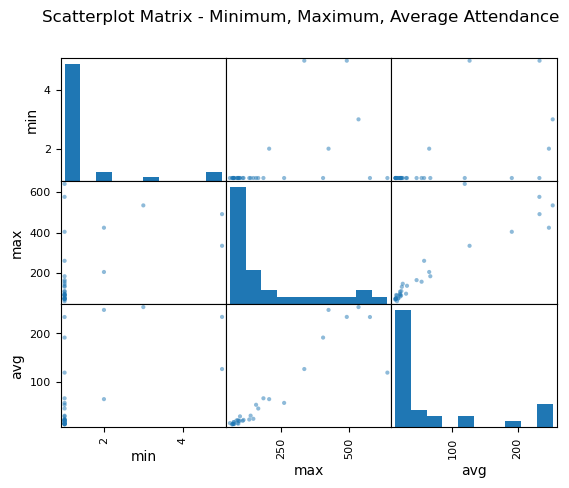

{'Wrightiraptor Mountain': {'min': 1, 'max': 158, 'avg': 52.75}, 'Galactosaurus Rage': {'min': 1, 'max': 261, 'avg': 56.63715277777778}, 'Auvilotops Express': {'min': 1, 'max': 640, 'avg': 118.97916666666667}, 'TerrorSaur': {'min': 2, 'max': 424, 'avg': 248.09375}, 'Wendisaurus Chase': {'min': 5, 'max': 491, 'avg': 233.6875}, 'Keimosaurus Big Spin': {'min': 2, 'max': 206, 'avg': 64.39756944444444}, 'Firefall': {'min': 1, 'max': 576, 'avg': 233.46875}, 'Atmosfear': {'min': 5, 'max': 335, 'avg': 126.359375}, 'North Line': {'min': 1, 'max': 166, 'avg': 45.06944444444444}, 'Jeredactyl Jump': {'min': 1, 'max': 112, 'avg': 21.66840277777778}, 'Sauroma Bumpers': {'min': 1, 'max': 148, 'avg': 23.866319444444443}, 'Flying TyrAndrienkos': {'min': 1, 'max': 98, 'avg': 19.76215277777778}, 'Cyndisaurus Asteroid': {'min': 1, 'max': 72, 'avg': 12.947916666666666}, 'Beelzebufo': {'min': 1, 'max': 93, 'avg': 13.869791666666666}, 'Enchanted Toadstools': {'min': 1, 'max': 77, 'avg': 12.864583333333334}, 

In [19]:
### TEST FUNCTION: test_question3
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
from pandas.plotting import scatter_matrix
query3_1 = """
SELECT sequence
FROM sequences
"""
c.execute(query3_1)
result3_1 = c.fetchall()

# Query to get rides IDs and names
query3_2 = """
SELECT AttractionID, Name
FROM attraction
WHERE Category LIKE '%Ride%'
"""
c.execute(query3_2)
result3_2 = c.fetchall()

# Extract ride IDs and names
ridesID = [row[0] for row in result3_2]
ridesName = [row[1] for row in result3_2]

# Initialize  data dictionary
resultArry = {ride: [] for ride in ridesName}
for ride in ridesName:
    for i in range(576):
        resultArry[ride].append(0)
#print(resultArry)
#for i in range(576):
#print(len(result2_1))
for seq in result3_1:
    seq1 = seq[0].split('-')
    for i in range(576):
        if int(seq1[i]) in  ridesID:
            ridename = ridesName[ridesID.index(int(seq1[i]))]
            #print(ridename)
            resultArry[ridename][i] += 1
dataforplat = {}
for ride in ridesName:
    filtered_values = [value for value in resultArry[ride] if value > 0]
    minval = np.min(filtered_values)
    maxval = np.max(filtered_values)
    meanval = np.mean(resultArry[ride])
    dataforplat[ride] = {'min':minval, 'max': maxval, 'avg':meanval}

# Create DataFrame for plotting
df = pd.DataFrame(dataforplat).T
df.reset_index(inplace=True)
df.rename(columns={'index': 'ride'}, inplace=True)
#print(df[['min', 'max', 'avg']])
scatter_matrix(df[['min', 'max', 'avg']])
plt.suptitle('Scatterplot Matrix - Minimum, Maximum, Average Attendance')
plt.show()
    
print(dataforplat)